## plotting and stff for early experiments

In [64]:
# imports and plotting defaults and shit like that
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import wandb
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = False
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
DPI = 400
import matplotlib.patches as patches

# dict with stuff in it idk
api = wandb.Api()
run_dict = {}
# rvi
run_dict[('rvi','hallway10')] = api.run("qtcc-university-of-toronto/average-reward-drl/yp1n561t")
run_dict[('rvi','hallway30')] = api.run("qtcc-university-of-toronto/average-reward-drl/y6el5ewq")
run_dict[('rvi','hallway50')] = api.run("qtcc-university-of-toronto/average-reward-drl/uou67ki2")
run_dict[('rvi','hallway70')] = api.run("qtcc-university-of-toronto/average-reward-drl/y2ryjjp4")
run_dict[('rvi','hallway90')] = api.run("qtcc-university-of-toronto/average-reward-drl/emso24wp")
# aro_ddpg
run_dict[('aro_ddpg','hallway10')] = api.run("qtcc-university-of-toronto/average-reward-drl/m3pu3hh1")
run_dict[('aro_ddpg','hallway30')] = api.run("qtcc-university-of-toronto/average-reward-drl/w8whead0")
run_dict[('aro_ddpg','hallway50')] = api.run("qtcc-university-of-toronto/average-reward-drl/mmfclq96")
run_dict[('aro_ddpg','hallway70')] = api.run("qtcc-university-of-toronto/average-reward-drl/oj930d7b")
run_dict[('aro_ddpg','hallway90')] = api.run("qtcc-university-of-toronto/average-reward-drl/1l26lw77")
# sac
run_dict[('sac','hallway10')] = api.run("qtcc-university-of-toronto/average-reward-drl/5he1u607")
run_dict[('sac','hallway30')] = api.run("qtcc-university-of-toronto/average-reward-drl/726p1x96")
run_dict[('sac','hallway50')] = api.run("qtcc-university-of-toronto/average-reward-drl/gh3ursur")
run_dict[('sac','hallway70')] = api.run("qtcc-university-of-toronto/average-reward-drl/92yww8j0")
run_dict[('sac','hallway90')] = api.run("qtcc-university-of-toronto/average-reward-drl/2nv4ragr")

# helper functions
def get_time_return_pair(run,hallway_size):
    history = run.scan_history()
    average_return = np.array([row["eval/average_rewards"] for row in history])
    average_return = average_return[average_return != np.array(None)]
    average_return = average_return * hallway_size # normalizes so 1 is optimal
    # stupid fucking wandb
    max_step = 0
    for row in history:
        max_step = row['step']
    env_step = np.linspace(1,max_step,num=len(average_return))
    return env_step,average_return
def moving_average(a, n=50):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [49]:
env_step,average_return = get_time_return_pair(run_dict['rvi','hallway50'],50)

(-1.1, 1.1)

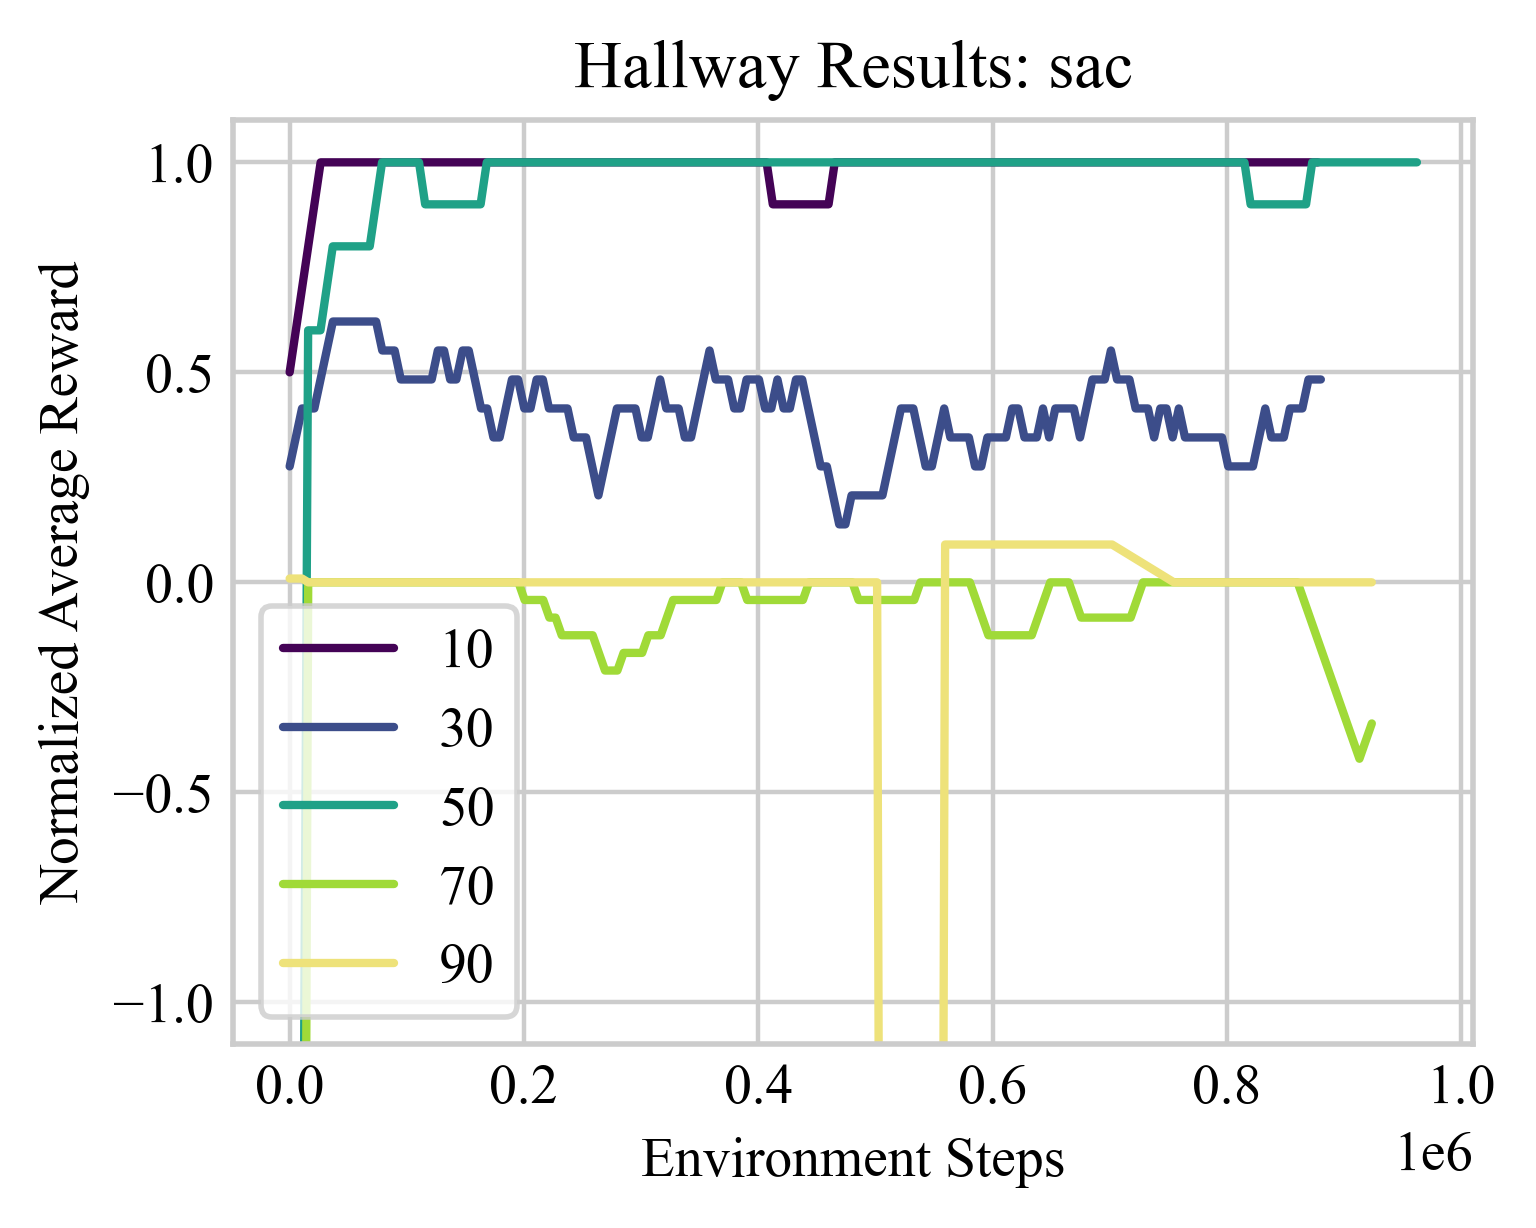

In [59]:
alg = 'sac'
fig, ax = plt.subplots(dpi=DPI,figsize=(4,3))
colours = ['#440356','#3c4d8a','#1fa187','#a0da38',"#eee27a"] # CANADA!!!!!!!!
for i,length in enumerate((10,30,50,70,90)):
    env_step,average_return = get_time_return_pair(run_dict[alg,'hallway'+str(length)],length)
    plt.plot(np.linspace(1,env_step[-1],len(moving_average(average_return,n=10))),moving_average(average_return,n=10),label=length,c=colours[i])
plt.legend()
plt.title('Hallway Results: ' + str(alg))
plt.xlabel('Environment Steps')
plt.ylabel('Normalized Average Reward')
plt.ylim((-1.1,1.1))

[1.0 1.0 0 0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -5.039999999999999 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0]
1.0
[0 0 0 0 0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

KeyboardInterrupt: 

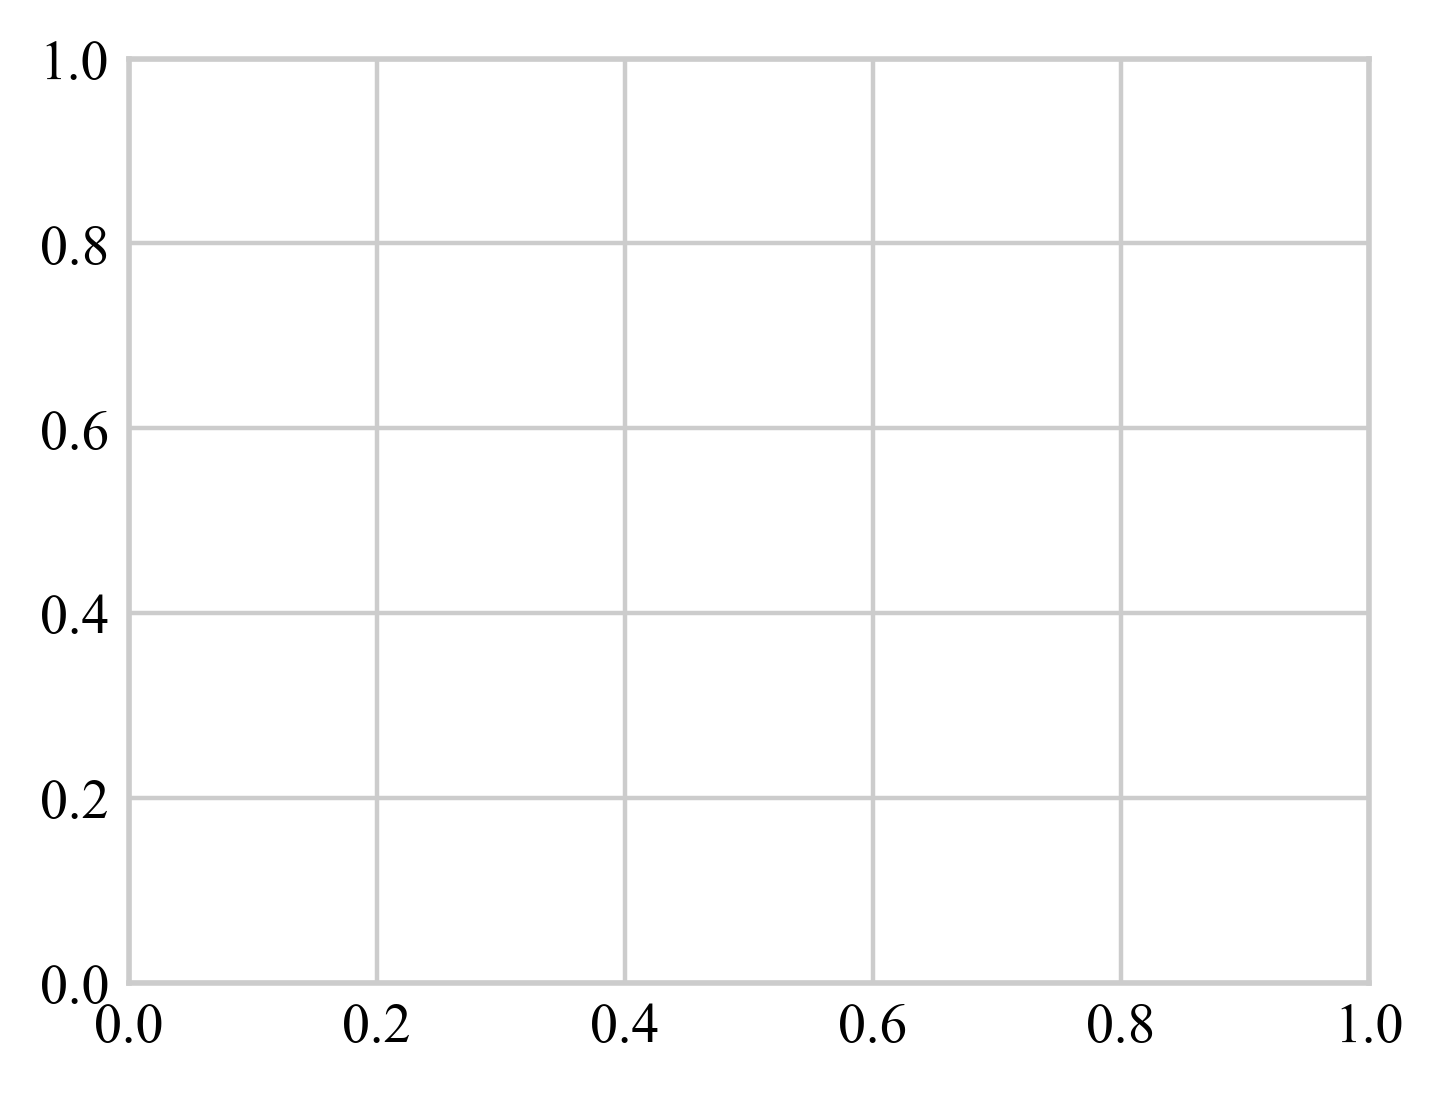

In [ ]:

fig, ax = plt.subplots(dpi=DPI,figsize=(4,3))
max_dict = {'rvi':[],'sac':[],'aro_ddpg':[]}
for i,length in enumerate((10,30,50,70,90)):
    for algorithm in ['rvi','sac','aro_ddpg']:
        env_step,average_return = get_time_return_pair(run_dict[algorithm,'hallway'+str(length)],length)
        #print(average_return)
        #print(np.max(average_return))
        max_dict[algorithm].append(np.max(average_return))

for algorithm in ['rvi','sac','aro_ddpg']:
    plt.plot((10,30,50,70,90),max_dict[algorithm],label=algorithm)
plt.legend()
plt.title('Hallway Max Performance Scaling')
plt.xlabel('Environment Steps')
plt.ylabel('Maximum Average Reward')
plt.ylim((-1.1,1.1))

In [69]:
max_dict

{'rvi': [1.0, 0.69, 0.9999999999999999, 0, 0.09000000000000002],
 'sac': [1.0, 0.69, 0.9999999999999999, 0, 0.09000000000000002],
 'aro_ddpg': [1.0, 0.69, 0.9999999999999999, 0, 0.09000000000000002]}

(-1.1, 1.1)

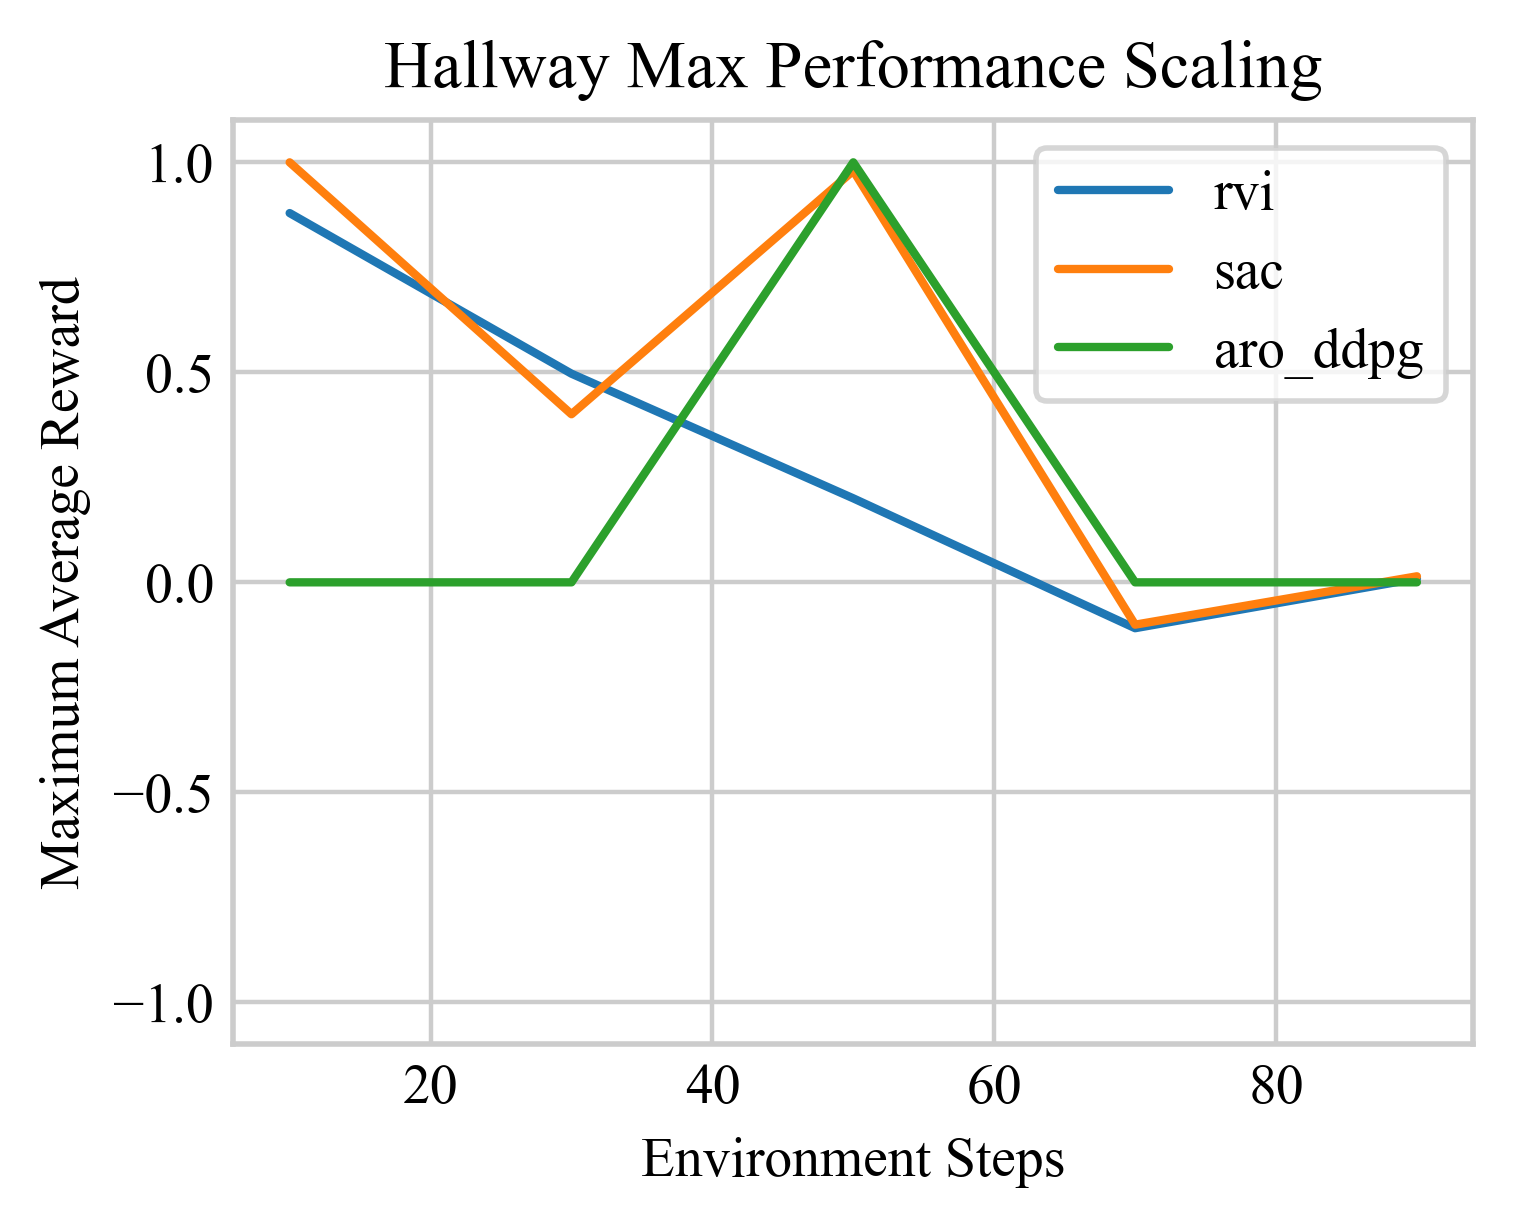

In [79]:
alg = 'sac'
fig, ax = plt.subplots(dpi=DPI,figsize=(4,3))
max_dict = {'rvi':[],'sac':[],'aro_ddpg':[]}
for i,length in enumerate((10,30,50,70,90)):
    for alg in ['rvi','sac','aro_ddpg']:
        env_step,average_return = get_time_return_pair(run_dict[alg,'hallway'+str(length)],length)
        max_dict[alg].append(np.mean(average_return[-50:]))

for alg in ['rvi','sac','aro_ddpg']:
    plt.plot((10,30,50,70,90),max_dict[alg],label=alg)
plt.legend()
plt.title('Hallway Max Performance Scaling')
plt.xlabel('Environment Steps')
plt.ylabel('Maximum Average Reward')
plt.ylim((-1.1,1.1))

(-1.1, 1.1)

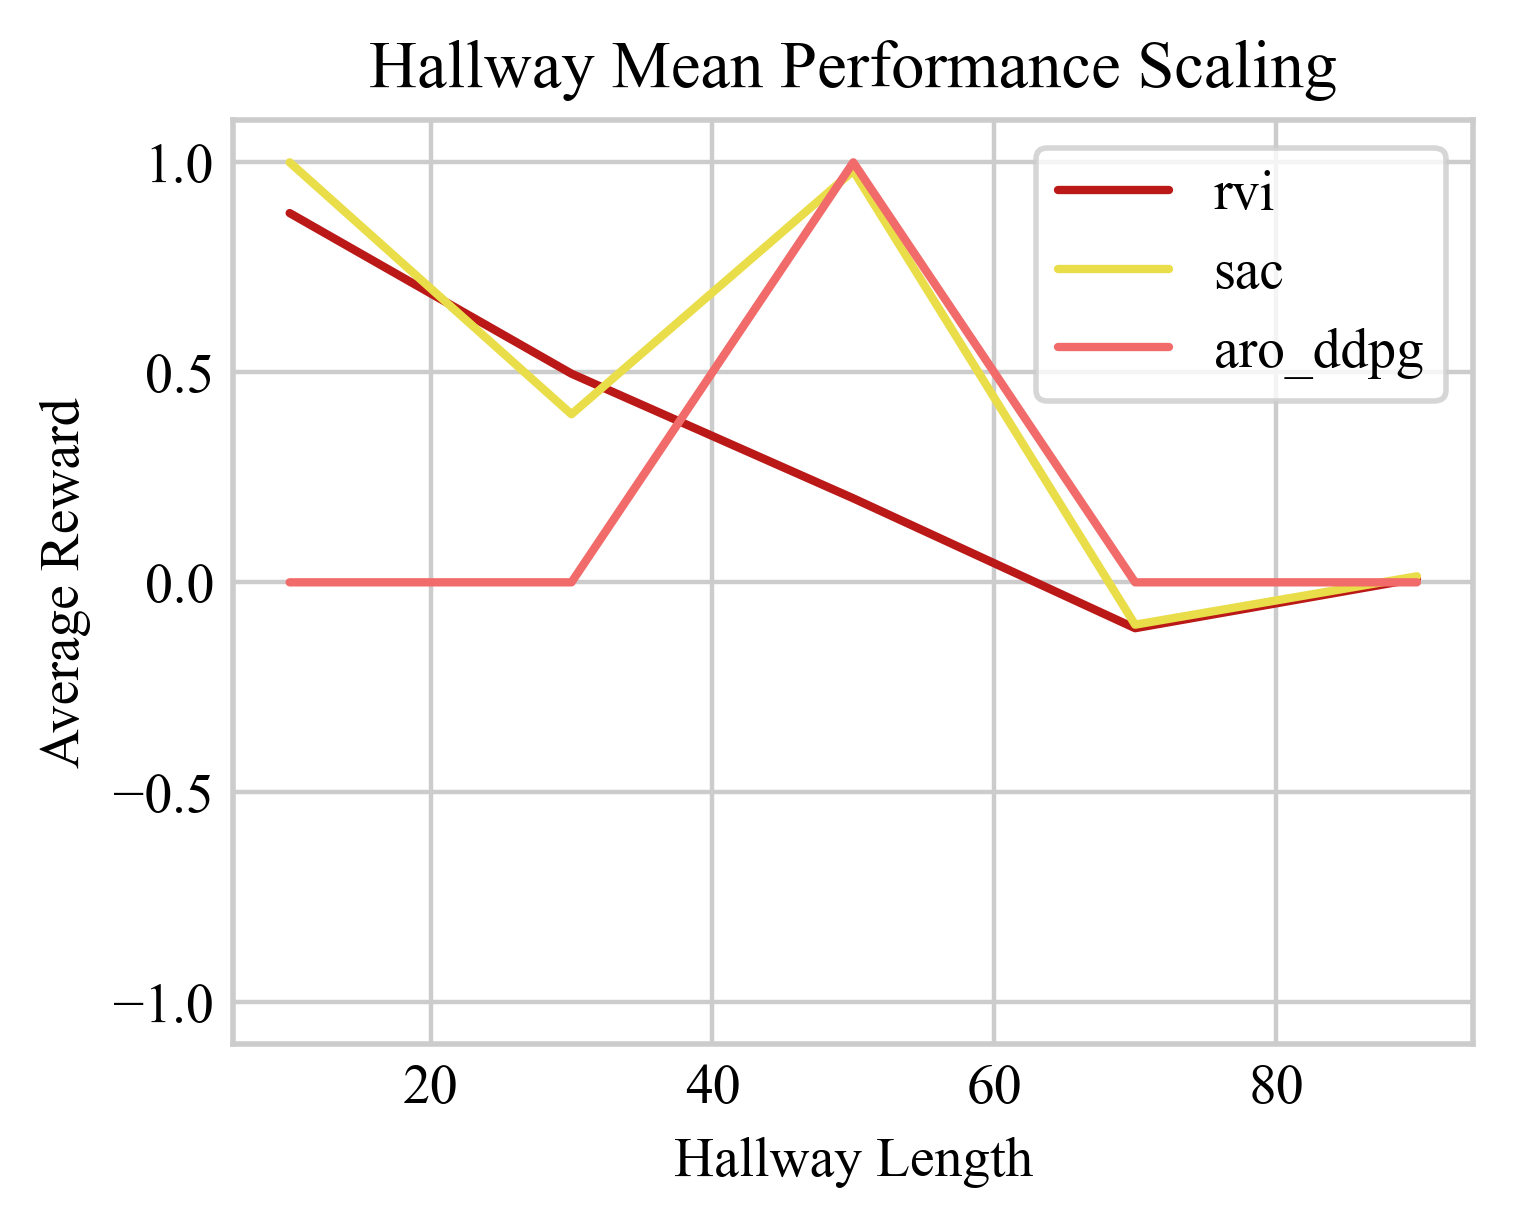

In [80]:
fig, ax = plt.subplots(dpi=DPI,figsize=(4,3))
colours = ["#BB1818","#e9de49","#f16b6b",]
for i,alg in enumerate(['rvi','sac','aro_ddpg']):
    plt.plot((10,30,50,70,90),max_dict[alg],label=alg,c=colours[i])
plt.legend()
plt.title('Hallway Mean Performance Scaling')
plt.xlabel('Hallway Length')
plt.ylabel('Average Reward')
plt.ylim((-1.1,1.1))